## GSAT trend patterns

In [1]:
# In[1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %%
# define function
import src.SAT_function as data_process
import src.Data_Preprocess as preprocess

In [2]:
# import src.slurm_cluster as scluster
# client, scluster = scluster.init_dask_slurm_cluster()

In [3]:
def func_mk(x):
    """
    Mann-Kendall test for trend
    """
    results = data_process.mk_test(x)
    slope = results[0]
    p_val = results[1]
    return slope, p_val

In [4]:
# load data
input_observation = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure1/'

HadCRUT5_annual_ano = xr.open_dataset(input_observation + 'tas_HadCRUT5_annual_anomalies.nc')


In [5]:
# HadCRUT5_annual_ano['tas']
print(HadCRUT5_annual_ano['tas'].values)

[[[        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  ...
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]]

 [[        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  ...
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
      

In [6]:
# process NaN values
HadCRUT5_annual_ano_processed = preprocess.preprocess_nan(HadCRUT5_annual_ano['tas'])

In [7]:
HadCRUT5_annual_ano_processed.min()

-5.226305955508849

In [8]:
HadCRUT5 = xr.DataArray(HadCRUT5_annual_ano_processed, coords=[HadCRUT5_annual_ano['tas'].year, HadCRUT5_annual_ano['tas'].lat, HadCRUT5_annual_ano['tas'].lon], dims=['year','lat','lon'])

In [9]:
HadCRUT5.min().values

array(-5.22630596)

In [10]:
# HadCRUT5.to_netcdf(input_observation + 'tas_HadCRUT5_annual_anomalies_processed.nc')

In [11]:
# input GSAT time series
input_ts_dir = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure1/'

GSAT_MMM_annual = xr.open_dataset(input_ts_dir + 'GMSAT_SMILEs_ENS_annual_timeseries_obtained_basedOn_ModelENS.nc')
GSAT_MMM_annual

<xarray.Dataset>
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
Data variables:
    tas      (year) float64 ...

In [12]:
GSAT_CanESM5_ENS_annual = xr.open_dataset(input_ts_dir + 'GMSAT_CanESM5_annual_timeseries_ENS.nc')
GSAT_CanESM5_ENS_annual

<xarray.Dataset>
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
Data variables:
    tas      (year) float64 ...

In [13]:
GSAT_IPSL_ENS_annual = xr.open_dataset(input_ts_dir + 'GMSAT_IPSL_CM6A_annual_timeseries_ENS.nc')
GSAT_IPSL_ENS_annual

<xarray.Dataset>
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
Data variables:
    tas      (year) float64 ...

In [14]:
GSAT_ACCESS_ENS_annual = xr.open_dataset(input_ts_dir + 'GMSAT_ACCESS_annual_timeseries_ENS.nc')
GSAT_ACCESS_ENS_annual

<xarray.Dataset>
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
Data variables:
    tas      (year) float64 ...

In [15]:
GSAT_EC_Earth_ENS_annual = xr.open_dataset(input_ts_dir + 'GMSAT_EC_Earth_annual_timeseries_ENS.nc')
GSAT_EC_Earth_ENS_annual

<xarray.Dataset>
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
Data variables:
    tas      (year) float64 ...

In [16]:
GSAT_MPI_ESM_ENS_annual = xr.open_dataset(input_ts_dir + 'GMSAT_MPI_ESM_annual_timeseries_ENS.nc')
GSAT_MPI_ESM_ENS_annual

<xarray.Dataset>
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
Data variables:
    tas      (year) float64 ...

In [17]:
GSAT_MIROC6_ENS_annual = xr.open_dataset(input_ts_dir + 'GMSAT_MIROC6_annual_timeseries_ENS.nc')
GSAT_MIROC6_ENS_annual

<xarray.Dataset>
Dimensions:  (year: 173)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
Data variables:
    tas      (year) float64 ...

In [18]:
lat = HadCRUT5['lat']
lon = HadCRUT5['lon']

In [19]:
HadCRUT_slope_Forced_signal, HadCRUT_intercept_Forced_signal = data_process.linear_regression_gmst(
    GSAT_MMM_annual['tas'],
    HadCRUT5.values)

HadCRUT_slope_Forced_signal_da = xr.DataArray(HadCRUT_slope_Forced_signal, coords=[lat, lon], dims=['lat', 'lon'])
HadCRUT_intercept_Forced_signal_da = xr.DataArray(HadCRUT_intercept_Forced_signal, coords=[lat, lon], dims=['lat', 'lon'])

In [ ]:
# output the slope and intercept of the forced signal
output_dir = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure1/'

HadCRUT_slope_Forced_signal_da.to_netcdf(output_dir + 'HadCRUT_slope_Beta_coefficients.nc')
HadCRUT_intercept_Forced_signal_da.to_netcdf(output_dir + 'HadCRUT_intercept_Alpha_constant.nc')

In [20]:
HadCRUT_slope_Forced_signal_CanESM5, HadCRUT_intercept_Forced_signal_CanESM5 = data_process.linear_regression_gmst(
    GSAT_CanESM5_ENS_annual['tas'],
    HadCRUT5.values)

HadCRUT_slope_Forced_signal_CanESM5_da = xr.DataArray(HadCRUT_slope_Forced_signal_CanESM5, coords=[lat, lon], dims=['lat', 'lon'])
HadCRUT_intercept_Forced_signal_CanESM5_da = xr.DataArray(HadCRUT_intercept_Forced_signal_CanESM5, coords=[lat, lon], dims=['lat', 'lon'])

HadCRUT_slope_Forced_signal_IPSL, HadCRUT_intercept_Forced_signal_IPSL = data_process.linear_regression_gmst(
    GSAT_IPSL_ENS_annual['tas'],
    HadCRUT5.values)

HadCRUT_slope_Forced_signal_IPSL_da = xr.DataArray(HadCRUT_slope_Forced_signal_IPSL, coords=[lat, lon], dims=['lat', 'lon'])
HadCRUT_intercept_Forced_signal_IPSL_da = xr.DataArray(HadCRUT_intercept_Forced_signal_IPSL, coords=[lat, lon], dims=['lat', 'lon'])

HadCRUT_slope_Forced_signal_ACCESS, HadCRUT_intercept_Forced_signal_ACCESS = data_process.linear_regression_gmst(
    GSAT_ACCESS_ENS_annual['tas'],
    HadCRUT5.values)

HadCRUT_slope_Forced_signal_ACCESS_da = xr.DataArray(HadCRUT_slope_Forced_signal_ACCESS, coords=[lat, lon], dims=['lat', 'lon'])
HadCRUT_intercept_Forced_signal_ACCESS_da = xr.DataArray(HadCRUT_intercept_Forced_signal_ACCESS, coords=[lat, lon], dims=['lat', 'lon'])

HadCRUT_slope_Forced_signal_EC_Earth, HadCRUT_intercept_Forced_signal_EC_Earth = data_process.linear_regression_gmst(
    GSAT_EC_Earth_ENS_annual['tas'],
    HadCRUT5.values)

HadCRUT_slope_Forced_signal_EC_Earth_da = xr.DataArray(HadCRUT_slope_Forced_signal_EC_Earth, coords=[lat, lon], dims=['lat', 'lon'])
HadCRUT_intercept_Forced_signal_EC_Earth_da = xr.DataArray(HadCRUT_intercept_Forced_signal_EC_Earth, coords=[lat, lon], dims=['lat', 'lon'])

HadCRUT_slope_Forced_signal_MPI_ESM, HadCRUT_intercept_Forced_signal_MPI_ESM = data_process.linear_regression_gmst(
    GSAT_MPI_ESM_ENS_annual['tas'],
    HadCRUT5.values)

HadCRUT_slope_Forced_signal_MPI_ESM_da = xr.DataArray(HadCRUT_slope_Forced_signal_MPI_ESM, coords=[lat, lon], dims=['lat', 'lon'])
HadCRUT_intercept_Forced_signal_MPI_ESM_da = xr.DataArray(HadCRUT_intercept_Forced_signal_MPI_ESM, coords=[lat, lon], dims=['lat', 'lon'])

HadCRUT_slope_Forced_signal_MIROC6, HadCRUT_intercept_Forced_signal_MIROC6 = data_process.linear_regression_gmst(
    GSAT_MIROC6_ENS_annual['tas'],
    HadCRUT5.values)

HadCRUT_slope_Forced_signal_MIROC6_da = xr.DataArray(HadCRUT_slope_Forced_signal_MIROC6, coords=[lat, lon], dims=['lat', 'lon'])
HadCRUT_intercept_Forced_signal_MIROC6_da = xr.DataArray(HadCRUT_intercept_Forced_signal_MIROC6, coords=[lat, lon], dims=['lat', 'lon'])

In [21]:
# Reconstruction of the forced signal
HadCRUT_Forced_signal           = GSAT_MMM_annual['tas'] * HadCRUT_slope_Forced_signal_da  + HadCRUT_intercept_Forced_signal_da
HadCRUT_Forced_signal_CanESM5   = GSAT_CanESM5_ENS_annual['tas'] * HadCRUT_slope_Forced_signal_CanESM5_da  + HadCRUT_intercept_Forced_signal_CanESM5_da
HadCRUT_Forced_signal_IPSL      = GSAT_IPSL_ENS_annual['tas'] * HadCRUT_slope_Forced_signal_IPSL_da   + HadCRUT_intercept_Forced_signal_IPSL_da
HadCRUT_Forced_signal_ACCESS    = GSAT_ACCESS_ENS_annual['tas'] * HadCRUT_slope_Forced_signal_ACCESS_da   + HadCRUT_intercept_Forced_signal_ACCESS_da
HadCRUT_Forced_signal_EC_Earth  = GSAT_EC_Earth_ENS_annual['tas'] * HadCRUT_slope_Forced_signal_EC_Earth_da   + HadCRUT_intercept_Forced_signal_EC_Earth_da
HadCRUT_Forced_signal_MPI_ESM   = GSAT_MPI_ESM_ENS_annual['tas'] * HadCRUT_slope_Forced_signal_MPI_ESM_da + HadCRUT_intercept_Forced_signal_MPI_ESM_da
HadCRUT_Forced_signal_MIROC6    = GSAT_MIROC6_ENS_annual['tas'] * HadCRUT_slope_Forced_signal_MIROC6_da  + HadCRUT_intercept_Forced_signal_MIROC6_da

In [22]:
# Residual
HadCRUT_residual            = HadCRUT5 - HadCRUT_Forced_signal
HadCRUT_residual_CanESM5    = HadCRUT5 - HadCRUT_Forced_signal_CanESM5
HadCRUT_residual_IPSL       = HadCRUT5 - HadCRUT_Forced_signal_IPSL
HadCRUT_residual_ACCESS     = HadCRUT5 - HadCRUT_Forced_signal_ACCESS
HadCRUT_residual_EC_Earth   = HadCRUT5 - HadCRUT_Forced_signal_EC_Earth
HadCRUT_residual_MPI_ESM    = HadCRUT5 - HadCRUT_Forced_signal_MPI_ESM
HadCRUT_residual_MIROC6     = HadCRUT5 - HadCRUT_Forced_signal_MIROC6

In [23]:
HadCRUT_Forced_signal

<xarray.DataArray (year: 173, lat: 90, lon: 180)>
array([[[-0.05986187, -0.05986232, -0.06001378, ..., -0.05978781,
         -0.059788  , -0.05986141],
        [-0.05818476, -0.05825013, -0.05833616, ..., -0.05802574,
         -0.05806991, -0.05811938],
        [-0.05158168, -0.05174476, -0.0519312 , ..., -0.05116822,
         -0.05128799, -0.0514186 ],
        ...,
        [-0.16897853, -0.16920398, -0.1695035 , ..., -0.16629003,
         -0.1667024 , -0.16875308],
        [-0.17246077, -0.1723098 , -0.17321857, ..., -0.17139616,
         -0.17123788, -0.17261174],
        [-0.17468362, -0.17468083, -0.17284932, ..., -0.17545592,
         -0.17545264, -0.17468641]],

       [[-0.05443101, -0.05443144, -0.05457174, ..., -0.05435708,
         -0.05435728, -0.05443058],
        [-0.05296764, -0.05302563, -0.05310196, ..., -0.05282508,
         -0.05286512, -0.05290965],
        [-0.04720561, -0.04734124, -0.04749747, ..., -0.04686452,
         -0.04696256, -0.04706999],
...
        [ 2.86428037,  2.87611891,  2.88539192, ...,  2.82870627,
          2.84054973,  2.85244183],
        [ 2.9053899 ,  2.91183886,  2.91807413, ...,  2.8860454 ,
          2.89249175,  2.89894094],
        [ 2.91603373,  2.91608655,  2.92881126, ...,  2.90330157,
          2.90335388,  2.91598092]],

       [[ 0.44887204,  0.44887396,  0.44976763, ...,  0.44893428,
          0.44893259,  0.44887013],
        [ 0.43052702,  0.43115316,  0.43197584, ...,  0.42914522,
          0.42948758,  0.42990089],
        [ 0.35834515,  0.36075423,  0.36339725, ...,  0.35197905,
          0.35389605,  0.35593608],
        ...,
        [ 2.94845624,  2.96062958,  2.97016823, ...,  2.91182032,
          2.92400389,  2.93628291],
        [ 2.99080324,  2.99742698,  3.0038605 , ...,  2.97089237,
          2.97751321,  2.98417951],
        [ 3.00180414,  3.00185834,  3.01488535, ...,  2.98874008,
          2.98879375,  3.00174993]]])
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2018 2019 2020 2021 2022
    height   float64 ...
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

#### Output the anomalies of forced and unforced to calculate the trend sensitivity to diff ECS

In [24]:
output_dir = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supplementary/S1/data_revise/'

HadCRUT_Forced_signal.to_netcdf(output_dir + 'HadCRUT_Forced_signal.nc')
HadCRUT_residual.to_netcdf(output_dir + 'HadCRUT_residual.nc')

HadCRUT_Forced_signal_CanESM5.to_netcdf(output_dir + 'HadCRUT_Forced_signal_CanESM5.nc')
HadCRUT_residual_CanESM5.to_netcdf(output_dir + 'HadCRUT_residual_CanESM5.nc')

HadCRUT_Forced_signal_IPSL.to_netcdf(output_dir + 'HadCRUT_Forced_signal_IPSL.nc')
HadCRUT_residual_IPSL.to_netcdf(output_dir + 'HadCRUT_residual_IPSL.nc')

HadCRUT_Forced_signal_ACCESS.to_netcdf(output_dir + 'HadCRUT_Forced_signal_ACCESS.nc')
HadCRUT_residual_ACCESS.to_netcdf(output_dir + 'HadCRUT_residual_ACCESS.nc')

HadCRUT_Forced_signal_EC_Earth.to_netcdf(output_dir + 'HadCRUT_Forced_signal_EC_Earth.nc')
HadCRUT_residual_EC_Earth.to_netcdf(output_dir + 'HadCRUT_residual_EC_Earth.nc')

HadCRUT_Forced_signal_MPI_ESM.to_netcdf(output_dir + 'HadCRUT_Forced_signal_MPI_ESM.nc')
HadCRUT_residual_MPI_ESM.to_netcdf(output_dir + 'HadCRUT_residual_MPI_ESM.nc')

HadCRUT_Forced_signal_MIROC6.to_netcdf(output_dir + 'HadCRUT_Forced_signal_MIROC6.nc')
HadCRUT_residual_MIROC6.to_netcdf(output_dir + 'HadCRUT_residual_MIROC6.nc')

In [25]:
# HadCRUT_Forced_signal_MPI_ESM

### Calculate the forced and unforced trend patterns

In [26]:
# calcualte the HadCRUT5 forced trend pattern
HadCRUT_annual_forced_trend, HadCRUT_annual_forced_p_value = xr.apply_ufunc(
    func_mk,
    HadCRUT_Forced_signal.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )
HadCRUT_annual_forced_trend_CanESM5, HadCRUT_annual_forced_p_value_CanESM5 = xr.apply_ufunc(
    func_mk,
    HadCRUT_Forced_signal_CanESM5.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_forced_trend_IPSL, HadCRUT_annual_forced_p_value_IPSL = xr.apply_ufunc(
    func_mk,
    HadCRUT_Forced_signal_IPSL.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_forced_trend_ACCESS, HadCRUT_annual_forced_p_value_ACCESS = xr.apply_ufunc(
    func_mk,
    HadCRUT_Forced_signal_ACCESS.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_forced_trend_EC_Earth, HadCRUT_annual_forced_p_value_EC_Earth = xr.apply_ufunc(
    func_mk,
    HadCRUT_Forced_signal_EC_Earth.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_forced_trend_MPI_ESM, HadCRUT_annual_forced_p_value_MPI_ESM = xr.apply_ufunc(
    func_mk,
    HadCRUT_Forced_signal_MPI_ESM.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_forced_trend_MIROC6, HadCRUT_annual_forced_p_value_MIROC6 = xr.apply_ufunc(
    func_mk,
    HadCRUT_Forced_signal_MIROC6.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

In [27]:
# Residual trend
HadCRUT_annual_residual_trend, HadCRUT_annual_residual_p_value = xr.apply_ufunc(
    func_mk,
    HadCRUT_residual.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

In [28]:
HadCRUT_annual_residual_trend_CanESM5, HadCRUT_annual_residual_p_value_CanESM5 = xr.apply_ufunc(
    func_mk,
    HadCRUT_residual_CanESM5.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_residual_trend_IPSL, HadCRUT_annual_residual_p_value_IPSL = xr.apply_ufunc(
    func_mk,
    HadCRUT_residual_IPSL.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_residual_trend_ACCESS, HadCRUT_annual_residual_p_value_ACCESS = xr.apply_ufunc(
    func_mk,
    HadCRUT_residual_ACCESS.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_residual_trend_EC_Earth, HadCRUT_annual_residual_p_value_EC_Earth = xr.apply_ufunc(
    func_mk,
    HadCRUT_residual_EC_Earth.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_residual_trend_MPI_ESM, HadCRUT_annual_residual_p_value_MPI_ESM = xr.apply_ufunc(
    func_mk,
    HadCRUT_residual_MPI_ESM.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

HadCRUT_annual_residual_trend_MIROC6, HadCRUT_annual_residual_p_value_MIROC6 = xr.apply_ufunc(
    func_mk,
    HadCRUT_residual_MIROC6.sel(year=slice(1950,2022)),
    input_core_dims=[['year']],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano['lat'].size, 'lon': HadCRUT5_annual_ano['lon'].size},
    )

In [29]:
# calculate the raw trend pattern
HadCRUT_annual_trend, HadCRUT_annual_p_value = xr.apply_ufunc(
    func_mk,
    HadCRUT5.sel(year=slice(1950,2022)),
    input_core_dims=[["year"]],
    output_core_dims=[[], []],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float, float],
    dask_gufunc_kwargs={'allow_rechunk': True}
    # output_sizes={'lat': HadCRUT5_annual_ano.lat.size, 'lon': HadCRUT5_annual_ano.lon.size},
    )

In [30]:
HadCRUT_annual_trend

<xarray.DataArray (lat: 90, lon: 180)>
array([[0.00777916, 0.00777853, 0.00778171, ..., 0.00777808, 0.0077769 ,
        0.0077798 ],
       [0.00770012, 0.00765838, 0.00771778, ..., 0.00780547, 0.00786648,
        0.00785946],
       [0.00657933, 0.00654149, 0.00660433, ..., 0.00639171, 0.00643804,
        0.0064895 ],
       ...,
       [0.04297824, 0.04333853, 0.04331989, ..., 0.04239972, 0.0427116 ,
        0.04273177],
       [0.04346586, 0.04363945, 0.04349888, ..., 0.04332749, 0.04334222,
        0.04332602],
       [0.04364354, 0.04364176, 0.04354037, ..., 0.04405233, 0.04405212,
        0.04364531]])
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

#### define function

In [31]:
# variable_name = ['10yr', '20yr', '30yr', '40yr', '50yr', '60yr', '70yr']
# # define the function
# def separate_data_into_intervals(data, start_year, end_year, time_interval):
#     """
#     This function is used to separate the data into different time intervals
#     """
#     # create a dictionary to store the data
#     data_dict = {}
#     for i in range(len(variable_name)):
#         # calculate the start year and end year
#         start_year = time_interval[variable_name[i]][0]
#         end_year = time_interval[variable_name[i]][1]
#         # select the data
#         data_dict[variable_name[i]] = data.sel(year=slice(str(start_year), str(end_year)))
#     return data_dict

In [32]:
# time_interval = {
#     "10yr":(2013,2022),
#     "20yr":(2003,2022),
#     "30yr":(1993,2022),
#     "40yr":(1983,2022),
#     "50yr":(1973,2022),
#     "60yr":(1963,2022),
#     "70yr":(1953,2022)
# }
# start_year = 1950
# end_year   = 2022

In [33]:
# data_dict = separate_data_into_intervals(HadCRUT5, start_year, end_year, time_interval)
# forced_dict = separate_data_into_intervals(HadCRUT5_forced, start_year, end_year, time_interval)
# internal_dict = separate_data_into_intervals(HadCRUT5_internal, start_year, end_year, time_interval)

In [34]:
# data_dict['10yr']

In [35]:
# # 1st calculate the origianl trend 
# trend_dict = {}
# pvalue_dict = {}

# for i in range(len(variable_name)):
#     data_var = data_dict[variable_name[i]]['tas']
    
#     slope, p_values = xr.apply_ufunc(
#         data_process.apply_mannkendall,
#         data_var,
#         input_core_dims=[["year"]],
#         output_core_dims=[[], []],
#         vectorize=True,
#         dask="parallelized",
#         output_dtypes=[float, float],
#         dask_gufunc_kwargs={'allow_rechunk': True}
#     )
#     trend_dict[variable_name[i]] = slope
#     pvalue_dict[variable_name[i]] = p_values

In [36]:
# trend_annual_np = {}
# pvalue_annual_np = {}

# for i in range(len(variable_name)):
#     trend_annual_np[variable_name[i]] = trend_dict[variable_name[i]].values
#     pvalue_annual_np[variable_name[i]] = pvalue_dict[variable_name[i]].values
    
# trend_annual_np['10yr']

In [37]:
# trend_annual_da = {}
# pvalue_annual_da = {}

# for interval, data in trend_annual_np.items():
#     trend_annual_da[interval] = xr.DataArray(data, dims=["lat", "lon"], coords={"lat": data_dict[interval].lat, "lon": data_dict[interval].lon})
# for interval, data in pvalue_annual_np.items():
#     pvalue_annual_da[interval] = xr.DataArray(data, dims=["lat", "lon"], coords={"lat": data_dict[interval].lat, "lon": data_dict[interval].lon})

In [38]:
# # save the data into netcdf file
# dir_output = '/work/mh0033/m301036/Land_surf_temp/analyses_1850_2100/Manuscript_visual_schematic/1950_2022_results/Trend_data/'
# for interval, data in trend_annual_da.items():
#     data.to_netcdf(dir_output + 'HadCRUT5_annual_' + interval + '_trend_MIROC6.nc')
    
# for interval, data in pvalue_annual_da.items():
#     data.to_netcdf(dir_output + 'HadCRUT5_annual_' + interval + '_p_value_MIROC6.nc')

In [39]:
# # 2nd calculate the forced trend
# forced_trend_dict = {}
# forced_pvalue_dict = {}

# for i in range(len(variable_name)):
#     data_var = forced_dict[variable_name[i]]['tas']
    
#     slope, p_values = xr.apply_ufunc(
#         data_process.apply_mannkendall,
#         data_var,
#         input_core_dims=[["year"]],
#         output_core_dims=[[], []],
#         vectorize=True,
#         dask="parallelized",
#         output_dtypes=[float, float],
#         dask_gufunc_kwargs={'allow_rechunk': True}
#     )
#     forced_trend_dict[variable_name[i]] = slope
#     forced_pvalue_dict[variable_name[i]] = p_values

# forced_trend_annual_np = {}
# forced_pvalue_annual_np = {}

# for i in range(len(variable_name)):
#     forced_trend_annual_np[variable_name[i]] = forced_trend_dict[variable_name[i]].values
#     forced_pvalue_annual_np[variable_name[i]] = forced_pvalue_dict[variable_name[i]].values
    
# forced_trend_annual_da = {}
# forced_pvalue_annual_da = {}

# for interval, data in forced_trend_annual_np.items():
#     forced_trend_annual_da[interval] = xr.DataArray(data, dims=["lat", "lon"], coords={"lat": data_dict[interval].lat, "lon": data_dict[interval].lon})
# for interval, data in forced_pvalue_annual_np.items():
#     forced_pvalue_annual_da[interval] = xr.DataArray(data, dims=["lat", "lon"], coords={"lat": data_dict[interval].lat, "lon": data_dict[interval].lon})

In [40]:
# # save the data into netcdf file
# dir_output = '/work/mh0033/m301036/Land_surf_temp/analyses_1850_2100/Manuscript_visual_schematic/1950_2022_results/Trend_data/'
# for interval, data in forced_trend_annual_da.items():
#     data.to_netcdf(dir_output + 'HadCRUT5_annual_forced_' + interval + '_trend_MIROC6.nc')
    
# for interval, data in forced_pvalue_annual_da.items():
#     data.to_netcdf(dir_output + 'HadCRUT5_annual_forced_' + interval + '_p_value_MIROC6.nc')

In [41]:
# # 3rd calculate the internal trend
# internal_trend_dict = {}
# internal_pvalue_dict = {}

# for i in range(len(variable_name)):
#     data_var = internal_dict[variable_name[i]]['tas']
    
#     slope, p_values = xr.apply_ufunc(
#         data_process.apply_mannkendall,
#         data_var,
#         input_core_dims=[["year"]],
#         output_core_dims=[[], []],
#         vectorize=True,
#         dask="parallelized",
#         output_dtypes=[float, float],
#         dask_gufunc_kwargs={'allow_rechunk': True}
#     )
#     internal_trend_dict[variable_name[i]] = slope
#     internal_pvalue_dict[variable_name[i]] = p_values

# internal_trend_annual_np = {}
# internal_pvalue_annual_np = {}

# for i in range(len(variable_name)):
#     internal_trend_annual_np[variable_name[i]] = internal_trend_dict[variable_name[i]].values
#     internal_pvalue_annual_np[variable_name[i]] = internal_pvalue_dict[variable_name[i]].values
    
# internal_trend_annual_da = {}
# internal_pvalue_annual_da = {}

# for interval, data in internal_trend_annual_np.items():
#     internal_trend_annual_da[interval] = xr.DataArray(data, dims=["lat", "lon"], coords={"lat": data_dict[interval].lat, "lon": data_dict[interval].lon})
# for interval, data in internal_pvalue_annual_np.items():
#     internal_pvalue_annual_da[interval] = xr.DataArray(data, dims=["lat", "lon"], coords={"lat": data_dict[interval].lat, "lon": data_dict[interval].lon})


In [42]:
# # save the data into netcdf file
# dir_output = '/work/mh0033/m301036/Land_surf_temp/analyses_1850_2100/Manuscript_visual_schematic/1950_2022_results/Trend_data/'
# for interval, data in internal_trend_annual_da.items():
#     data.to_netcdf(dir_output + 'HadCRUT5_annual_internal_' + interval + '_trend_MIROC6.nc')
    
# for interval, data in internal_pvalue_annual_da.items():
#     data.to_netcdf(dir_output + 'HadCRUT5_annual_internal_' + interval + '_p_value_MIROC6.nc')

### Plotting with the Robinson Projections

In [43]:
plt.rcParams['figure.figsize'] = (8, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['savefig.transparent'] = True

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

def plot_trend_with_significance(trend_data, lats, lons, p_values, GMST_p_values=None, levels=None, extend=None, cmap=None, 
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - trend_data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """

    # Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
  
    # Determine significance mask (where p-values are less than 0.05)
    # significance_mask = p_values < 0.05
    insignificance_mask = p_values >= 0.10
    
    # Plotting
    # contour_obj = ax.pcolormesh(lons, lats, trend_data,  cmap='RdBu_r',vmin=-5.0, vmax=5.0, transform=ccrs.PlateCarree(central_longitude=180), shading='auto')
    contour_obj = ax.contourf(lons, lats, trend_data, levels=levels, cmap=cmap, extend=extend,transform=ccrs.PlateCarree(central_longitude=0))

    # Plot significance masks with different hatches
    ax.contourf(lons, lats, insignificance_mask, levels=[0, 0.10, 1.0],hatches=[None,'///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                      color='gray', alpha=0.35, linestyle='--')

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 14}
    gl.ylabel_style = {'size': 14}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontsize=18, pad=5.0)

    return contour_obj


In [44]:
# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable

intervals = [-0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.1, 1.3]

# Normalizing the intervals to [0, 1]
min_interval = min(intervals)
max_interval = max(intervals)
normalized_intervals = [(val - min_interval) / (max_interval - min_interval) for val in intervals]

# cmap = mcolors.ListedColormap(palettable.scientific.diverging.Vik_20.mpl_colors)
cmap=mcolors.ListedColormap(palettable.cmocean.diverging.Balance_20.mpl_colors)

# Define the colors at each interval
colors = [(0.00784313725490196, 0.2, 0.4627450980392157, 1.0),
    (0.00784313725490196, 0.2, 0.4627450980392157, 1.0),
    (0.023529411764705882, 0.32941176470588235, 0.5450980392156862, 1.0),
    (0.023529411764705882, 0.32941176470588235, 0.5450980392156862, 1.0),
    (1.0, 1.0, 1.0, 1.0),
    (1.0, 0.9, 0.98, 1.0),
    (1.0, 0.8, 0.5, 1.0),
    (1.0, 0.803921568627451, 0.607843137254902, 1.0), 
    (1.0, 0.6000000000000001, 0.20000000000000018, 1.0),
    (1.0, 0.4039215686274509, 0.0, 1.0),
    (0.8999999999999999, 0.19999999999999996, 0.0, 1.0),
    (0.7470588235294118, 0.0, 0.0, 1.0), 
    (0.6000000000000001, 0.0, 0.0, 1.0),
    (0.44705882352941173, 0.0, 0.0, 1.0),
    (0.30000000000000004, 0.0, 0.0, 1.0),
    (0.14705882352941177, 0.0, 0.0, 1.0),
    (0.0, 0.0, 0.0, 1.0)]

# Creating a list of tuples with normalized positions and corresponding colors
color_list = list(zip(normalized_intervals, colors))

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list('my_custom_cmap', color_list)

# Create a normalization
norm = Normalize(vmin=min_interval, vmax=max_interval)

In [45]:
# put the data into a dictionary
# 1950-2022 raw trend
# trend_data = HadCRUT_annual_trend*10.0
# forced trend
forced_trend_data = xr.Dataset({'MMEM': HadCRUT_annual_forced_trend*10.0, 
                    'CanESM5': HadCRUT_annual_forced_trend_CanESM5*10.0,
                    'IPSL': HadCRUT_annual_forced_trend_IPSL*10.0,
                    'EC_Earth': HadCRUT_annual_forced_trend_EC_Earth*10.0,
                    'ACCESS': HadCRUT_annual_forced_trend_ACCESS*10.0,
                    'MPI_ESM': HadCRUT_annual_forced_trend_MPI_ESM*10.0,
                    'MIROC6': HadCRUT_annual_forced_trend_MIROC6*10.0}, 
                    coords={'lat': HadCRUT5['lat'], 'lon': HadCRUT5['lon']})

forced_p_val_data = xr.Dataset({'MMEM': HadCRUT_annual_forced_p_value,
                    'CanESM5': HadCRUT_annual_forced_p_value_CanESM5,
                    'IPSL': HadCRUT_annual_forced_p_value_IPSL,
                    'EC_Earth': HadCRUT_annual_forced_p_value_EC_Earth,
                    'ACCESS': HadCRUT_annual_forced_p_value_ACCESS,
                    'MPI_ESM': HadCRUT_annual_forced_p_value_MPI_ESM,
                    'MIROC6': HadCRUT_annual_forced_p_value_MIROC6},
                    coords={'lat': HadCRUT5['lat'], 'lon': HadCRUT5['lon']})

# unforced trend
unforced_trend_data = xr.Dataset({'MMEM': HadCRUT_annual_residual_trend*10.0,
                        'CanESM5': HadCRUT_annual_residual_trend_CanESM5*10.0,
                        'IPSL': HadCRUT_annual_residual_trend_IPSL*10.0,
                        'EC_Earth': HadCRUT_annual_residual_trend_EC_Earth*10.0,
                        'ACCESS': HadCRUT_annual_residual_trend_ACCESS*10.0,
                        'MPI_ESM': HadCRUT_annual_residual_trend_MPI_ESM*10.0,
                        'MIROC6': HadCRUT_annual_residual_trend_MIROC6*10.0},
                        coords={'lat': HadCRUT5['lat'], 'lon': HadCRUT5['lon']})

unforced_p_val_data = xr.Dataset({'MMEM': HadCRUT_annual_residual_p_value,
                    'CanESM5': HadCRUT_annual_residual_p_value_CanESM5,
                    'IPSL': HadCRUT_annual_residual_p_value_IPSL,
                    'EC_Earth': HadCRUT_annual_residual_p_value_EC_Earth,
                    'ACCESS': HadCRUT_annual_residual_p_value_ACCESS,
                    'MPI_ESM': HadCRUT_annual_residual_p_value_MPI_ESM,
                    'MIROC6': HadCRUT_annual_residual_p_value_MIROC6},
                    coords={'lat': HadCRUT5['lat'], 'lon': HadCRUT5['lon']})


In [46]:
# # transform the trend data unit to degree per decade
# for i in range(len(variable_name)):
#     # forced_trend_annual_da[variable_name[i]] = forced_trend_annual_da[variable_name[i]] * 10
#     internal_trend_annual_da[variable_name[i]] = internal_trend_annual_da[variable_name[i]] * 10

In [47]:
# # check the min and max value of the trend
# for i in range(len(variable_name)):
#     # print(variable_name[i], forced_trend_annual_da[variable_name[i]].min().values, forced_trend_annual_da[variable_name[i]].max().values)
#     print(variable_name[i], internal_trend_annual_da[variable_name[i]].min().values, internal_trend_annual_da[variable_name[i]].max().values)

In [48]:
# check the min and max value of the trend
# print(trend_data.min().values, trend_data.max().values)

In [49]:
print(unforced_trend_data.min().values, unforced_trend_data.max().values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:   ()
Coordinates:
    height    float64 2.0
Data variables:
    MMEM      float64 -0.1447
    CanESM5   float64 -0.1553
    IPSL      float64 -0.1295
    EC_Earth  float64 -0.1118
    ACCESS    float64 -0.1641
    MPI_ESM   float64 -0.1246
    MIROC6    float64 -0.1454> <bound method Mapping.values of <xarray.Dataset>
Dimensions:   ()
Coordinates:
    height    float64 2.0
Data variables:
    MMEM      float64 0.1536
    CanESM5   float64 0.1303
    IPSL      float64 0.1693
    EC_Earth  float64 0.1846
    ACCESS    float64 0.1331
    MPI_ESM   float64 0.1736
    MIROC6    float64 0.1579>


MMEM
CanESM5
IPSL
EC_Earth
ACCESS
MPI_ESM
MIROC6


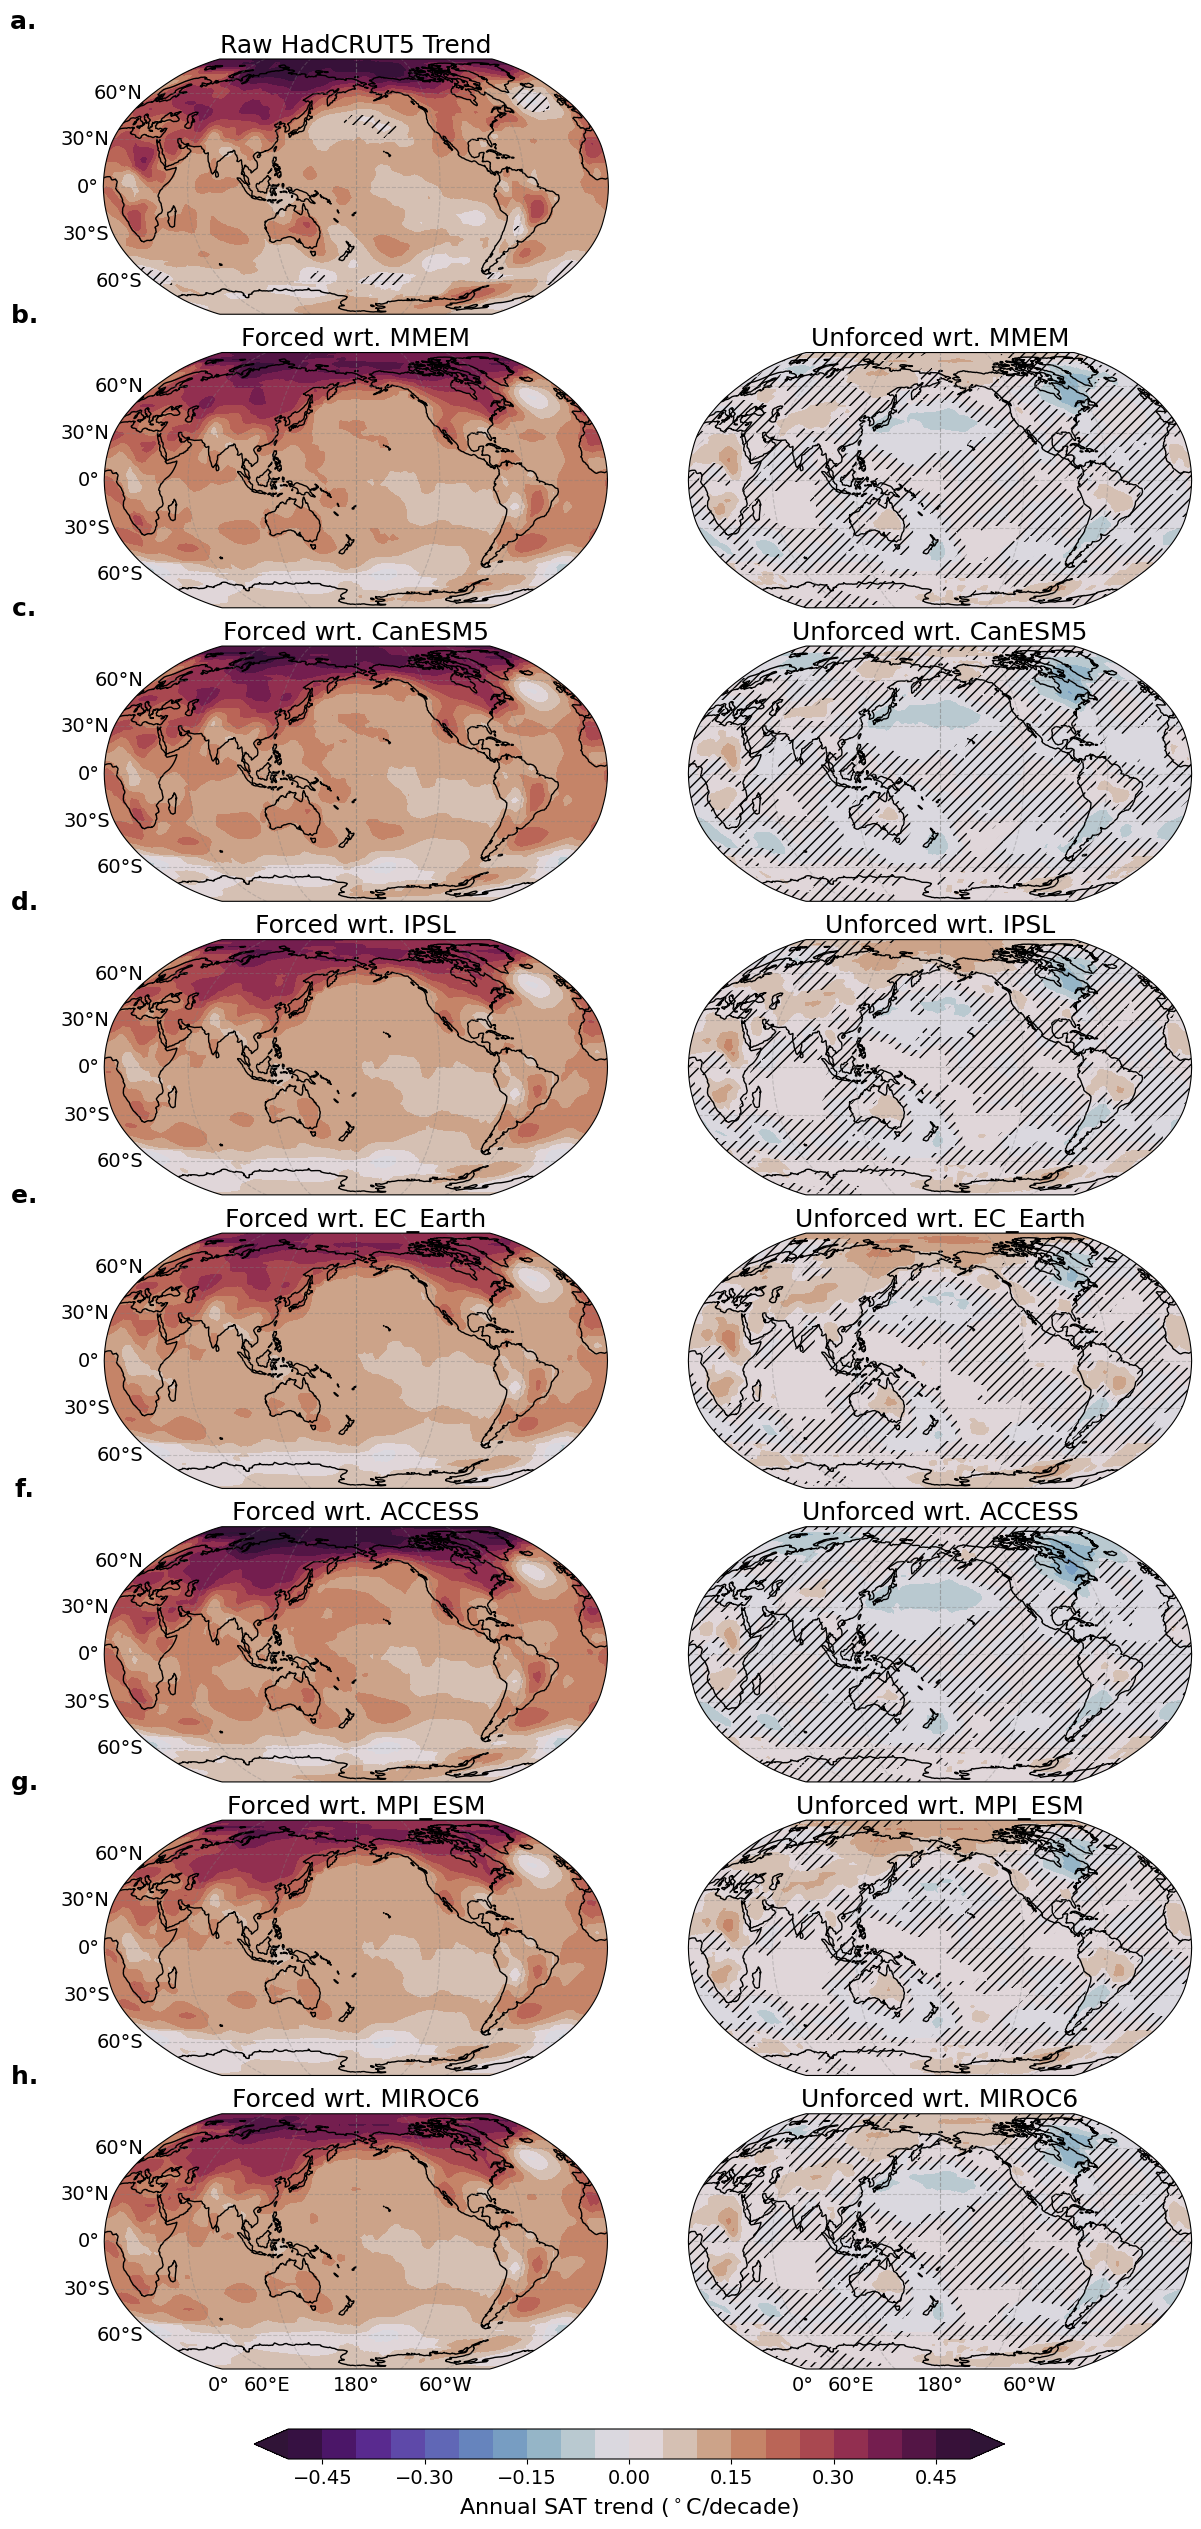

In [50]:
# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import numpy as np
import cartopy.util as cutil
import matplotlib.colors as mcolors
import palettable

lat = HadCRUT5.lat
lon = HadCRUT5.lon
lat, lon 

variable_name = ["MMEM", "CanESM5", "IPSL", "EC_Earth", "ACCESS", "MPI_ESM", "MIROC6"]

# titles = ["Forced.wrt.MMEM", "Forced.wrt.CanESM5", "Forced.wrt.IPSL-CM6A-LR", 
        #   "Forced.wrt.EC-Earth3", "Forced.wrt.ACCESS-ESM1.5", "Forced.wrt.MPI-ESM-LR1.2", "Forced.wrt.MIROC6"]
titles = ["Raw HadCRUT5 Trend"] + ["Forced wrt. " + model for model in variable_name] + ["Unforced wrt. " + model for model in variable_name]

titles_right = ["Unforced.wrt.MMEM", "Unforced.wrt.CanESM5", "Unforced.wrt.IPSL-CM6A-LR",
                "Unforced.wrt.EC-Earth3", "Unforced.wrt.ACCESS-ESM1.5", "Unforced.wrt.MPI-ESM-LR1.2", "Unforced.wrt.MIROC6"]

titles_label = ["a. ", "b. ", "c. ", "d. ", "e. ", "f. ", "g. ", "h. "]

# Figure arange as: 8 rows and 2 columns, with the first column for the forced trend and the second column for the unforced trend;
# The first row is for the raw HadCRUT5 trend, the following row will show the trend for each model

intervals = np.arange(-0.5, 0.55, 0.05)
# cmap = mcolors.ListedColormap(palettable.cmocean.sequential.Amp_20.mpl_colors)
cmap=mcolors.ListedColormap(palettable.cmocean.diverging.Balance_20.mpl_colors)

fig  = plt.figure(figsize=(15,30))
gs = gridspec.GridSpec(8, 2, figure=fig, wspace=0.01, hspace=0.15)
extend ='both'

ax = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson(180))
trend_data = HadCRUT_annual_trend*10.0
p_values = HadCRUT_annual_p_value
trend_data_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
contour_obj = plot_trend_with_significance(trend_data_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                           levels=intervals, extend=extend,
                                           cmap='twilight_shifted', title=titles[0], ax=ax, show_xticks=False, show_yticks=True)
#add title for the first row
ax.text(-0.15, 1.1, titles_label[0], va='bottom', ha='center', rotation='horizontal', fontsize=18,
        weight='bold', transform=ax.transAxes)
axes = {}
for i in range(1,8):
    for j in range(2):
        is_left = j == 0
        is_bottom_row = i >= 7
        
        ax = fig.add_subplot(gs[i, j], projection=ccrs.Robinson(180))
        ax.set_global()
        axes[(i, j)] = ax
        if j == 0:
            # Add cyclic points
            print(variable_name[i-1])
            trend_data_var = forced_trend_data[variable_name[i-1]]
            p_values_var = forced_p_val_data[variable_name[i-1]]
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data_var, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values_var, coord=lon)
            
            contour_obj1 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                                       levels=intervals, extend=extend,
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        else:
            trend_data_var = unforced_trend_data[variable_name[i-1]]
            p_values_var =unforced_p_val_data[variable_name[i-1]]
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data_var, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values_var, coord=lon)
            
            contour_obj2 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals,
                                                        extend=extend, cmap='twilight_shifted', title=titles[i+7], 
                                                        ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)

# add the title for each row and column
# axes[0, 0].text(-0.15, 1.1, titles_label[0], va='bottom', ha='center', rotation='horizontal', fontsize=22, 
#                     weight='bold', transform=axes[0, 0].transAxes)

for i in range(1,8):
    axes[i, 0].text(-0.15, 1.1, titles_label[i], va='bottom', ha='center', rotation='horizontal', fontsize=18, 
                    weight='bold', transform=axes[i, 0].transAxes)

# add colorbar for each row [degc/60yr, 30yr, 10yr], horizontal colorbar
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.01])
cbar = fig.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal', extend=extend)
# cbar.set_label('SAT trend ($^\circ$C/60yr)', fontsize=14)
fig.text(0.5, 0.06,'Annual SAT trend ($^\circ$C/decade)',fontsize=16, ha='center', va='bottom')
cbar.ax.tick_params(labelsize=14)

# plt.figure(constrained_layout=True)
# fig.savefig('FigureS1-1950-2022-HadCRUT5-Trend-separation.png', dpi=300, bbox_inches='tight')
fig.savefig('FigureS1-1950-2022-HadCRUT5-Trend-separation(NaNprocess)-revised.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
client.close()
scluster.close()